# Author: Katelyn M Campbell
# Assignment: Capstone Milestone 3- Poisson
# Class: DSC-580
# Date: 4/23/2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
import statistics
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import os
import math
import graphviz
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from graphviz import Digraph
import matplotlib.image as mpimg
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
from urllib.request import urlopen
from scipy.stats import chi2_contingency
#loads necessary packages

# Help

### Purpose:
To build Poisson Regression models and generate reports.

### How to Run:
- Run each cell in order (previous generated information may not be captured otherwise).
- Modify the data, model and their features as needed.

### What You'll Get:
- Printed and saved reports of MSE, R-squared, and cross validation results (as .txt files).
- Printed and saved observed vs. predicted value graphs (as PNG images).

### Functions Included:
- pd.read_csv()
- train_test_split()
- linear_model.PoissonRegressor()
- fit()
- predict()
- scatter(), as well as other releavant graphing functions
- mean_squared_error()
- r2_score()
- cross_validate()
- print()

Please use the `help(function_name)` in a new cell to learn more about any functions.

Additional note: The interpretation is based on the model last generated by the developer. Any newly completed iterations will change the training and testing split of the data, which may impact the results. Any modifications also would alter the results. New interpretations would be required.

In [2]:
def log_step(step_name):
 print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] {step_name}")
#logs when each step was ran

In [3]:
# option to upload url data
try:
    url = input("Enter the URL to load (.csv or .json): ").strip()
    if url.endswith('.csv'):
        df = pd.read_csv(url)
        print(df)
        print("Remember to update models to use 'url'")
    elif url.endswith('.json'):
        response = urlopen(url)
        data = json.loads(response.read().decode('utf-8'))
        print(data)
        print("Remember to update models to use 'url'")
    else:
        print("Unsupported file format or no url entered.")
except Exception as e:
    print(f"An error occurred: {e}")
# for reading URL data

Unsupported file format or no url entered.


There was no URL file uploaded, so the test expectations were met.

In [4]:
log_step("Loading Data")
data_clean = pd.read_csv("C:/Users/User/Desktop/GCU/Grad/data_clean.csv")
data_nomean_out = pd.read_csv("C:/Users/User/Desktop/GCU/Grad/data_nomean_out.csv")
data_nomedian_out = pd.read_csv("C:/Users/User/Desktop/GCU/Grad/data_nomedian_out.csv")
data_log = pd.read_csv("C:/Users/User/Desktop/GCU/Grad/data_log.csv")
print("Data Loaded")
#loads data and logs time
#can replace path for different data

[2025-04-16 22:22:23] Loading Data
Data Loaded


In [74]:
try:
    data = pd.read_csv("C:/Users/User/Desktop/GCU/Grad/data_clean.csv")
    assert not data.empty, "Loaded dataframe is empty."
    print("Data loaded successfully and is not empty.")
except FileNotFoundError:
    print("File not found. Check the file path.")
except pd.errors.ParserError:
    print("Failed to parse the file. Check format.")
except AssertionError as ae:
    print(f"Data issue: {ae}")
except Exception as e:
    print(f"Unexpected error: {e}")
    # tests loading data

Data loaded successfully and is not empty.


The data was able to load, meeting test expectations.

## Model

In [6]:
log_step("Analyzing Data")
#logs time step completed

[2025-04-16 22:22:31] Analyzing Data


In [ ]:
X =data_clean['COVID-19 doses (daily)']
y = data_clean['Daily new confirmed deaths due to COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_mean =data_nomean_out['COVID-19 doses (daily, no outliers)']
y_mean = data_nomean_out['Daily new confirmed deaths due to COVID-19 (no outliers)']
X_mean_train, X_mean_test, y_mean_train, y_mean_test = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)

X_median =data_nomedian_out['COVID-19 doses (daily, no outliers)']
y_median = data_nomedian_out['Daily new confirmed deaths due to COVID-19 (no outliers)']
X_median_train, X_median_test, y_median_train, y__median_test = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

X_log =data_log['COVID-19 doses (daily)']
y_log = data_log['Daily new confirmed deaths due to COVID-19']
X_log_train, X_log_test, y_log_train, y__log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
#trains original data, no outliers based on mean, no outliers based on median, and log data sets (Sarahjane3102, 2022)

In [8]:
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    total_rows = len(X)
    train_rows = len(X_train)
    test_rows = len(X_test)

    if train_rows + test_rows == total_rows:
        print("Train-test split successful. Row count is consistent.")
    else:
        print(f"Train-test split mismatch. Expected {total_rows}, got {train_rows + test_rows}.")
    if X_train.index.intersection(X_test.index).any():
        print("Overlap found between training and test data.")
    else:
        print("No overlap between train and test sets.")

except Exception as e:
    print(f"Error during train-test split validation: {e}")
# test train-test split

Train-test split successful. Row count is consistent.
No overlap between train and test sets.


The data was successfully split into a training and testing group. The rows are in an appropriate length and there is no data overlap between the two groups. Test expectations were met.

In [ ]:
clf = linear_model.PoissonRegressor()
model = clf.fit(X_train.values.reshape(-1, 1),y_train)
predictions = clf.predict(X_test.values.reshape(-1, 1))
# creates model (Katla, 2020)


In [ ]:
clf_mean = linear_model.PoissonRegressor()
model_mean_no_out = clf_mean.fit(X_mean_train.values.reshape(-1, 1),y_mean_train)
predictions_mean = clf_mean.predict(X_mean_test.values.reshape(-1, 1))
# creates model based on outliers removed by the mean (Katla, 2020)

In [ ]:
clf_median = linear_model.PoissonRegressor()
model_median_no_out = clf_median.fit(X_median_train.values.reshape(-1, 1),y_median_train)
predictions_median = clf_median.predict(X_median_test.values.reshape(-1, 1))
# creates model based on outliers removed by the median (Katla, 2020)

In [ ]:
clf_log = linear_model.PoissonRegressor()
model_log = clf_log.fit(X_log_train.values.reshape(-1, 1),y_log_train)
predictions_log = clf_log.predict(X_log_test.values.reshape(-1, 1))
# creates model with log transformed data (Katla, 2020)

In [13]:
try:
    clf.fit(X_train.values.reshape(-1, 1), y_train)
    print("Model trained successfully.")
    test_predict = clf.predict(X_test.values.reshape(-1, 1))
    print("Model predicted successfully.")
    if len(test_predict) == len(X_test):
        print("Prediction output shape is correct.")
    else:
        print("Prediction output shape mismatch.")
except Exception as e:
    print(f"Model training or predicting failed: {e}")
# tests model fit and predictions

Model trained successfully.
Model predicted successfully.
Prediction output shape is correct.


The model was able to train, generate predictions, and have the correct output shape. Test expectations were met.

In [14]:
log_step("Data Analyzed")
#prints that step was completed

[2025-04-16 22:22:35] Data Analyzed


Three models were chosen to compare and analyze which performed the best.
These included the Poisson regression, Random Forest, and Deep Neural
Networks. Overall, the ideal is to see three differing styles of approaches to
modeling, with different levels of computational complexity. The dependent
variable in the model is the daily new confirmed deaths due to COVID-19, and
the independent variable is the daily new COVID-19 doses. Eighty percent of the
data will be used to train, and twenty percent will be used as testing data. All
data sets created, (the original observations, observations without outliers based
on standard deviations away and interquartile range away, and log
transformation), will be ran through the models and compared.

Poisson regression was chosen as the initial model, due to the data being countbased, its wide use in the research community, and the lower number of
limitations than other modeling, such as ARIMA (The Pennsylvania State
University, n.d. & Liu, 2024). The mathematical representation of a Poisson
regression is as follows: log(λ i) = log(ni) + Xiβ (Elliot et al., 2005). The entity, λ
is the expected number of deaths on a given day, n is the offset term, X is the
independent variables, and β is the coefficient to be estimated. The function
linear_model.PoissonRegressor() from Scikit-learn was utilized to create the
model. Initial analysis will be made from the mean squared error, R-squared, and
predictions against observed values graph.

## Visual Tools

In [15]:
log_step("Visually Displaying Analyzed Data")
#logs time of step

[2025-04-16 22:22:35] Visually Displaying Analyzed Data


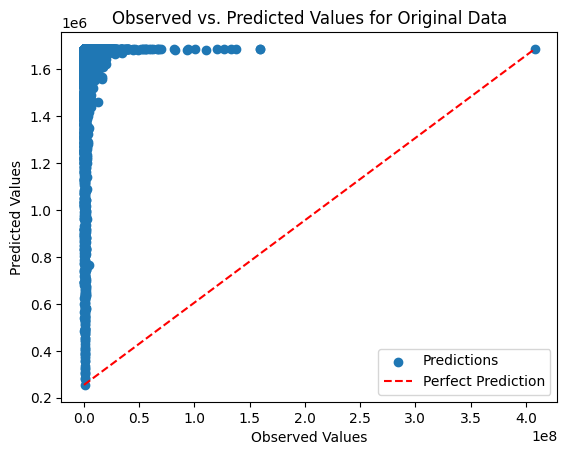

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter(y_test, predictions,label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(predictions), max(predictions)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values for Original Data')
plt.legend()
plt.show()
plt.savefig("poisson_observed_vs_predicted.png")
#graphs and saves observed vs. predicted values

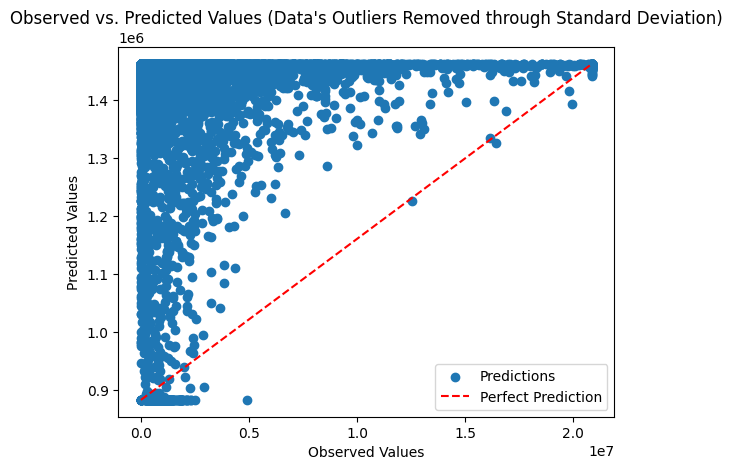

<Figure size 640x480 with 0 Axes>

In [18]:
plt.scatter(y_mean_test, predictions_mean,label='Predictions')
plt.plot([min(y_mean_test), max(y_mean_test)], [min(predictions_mean), max(predictions_mean)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title("Observed vs. Predicted Values (Data's Outliers Removed through Standard Deviation)")
plt.legend()
plt.show()
plt.savefig("poisson_observed_vs_predicted_mean.png")
#graphs and saves observed vs. predicted values (outliers removed through standard deviations away)


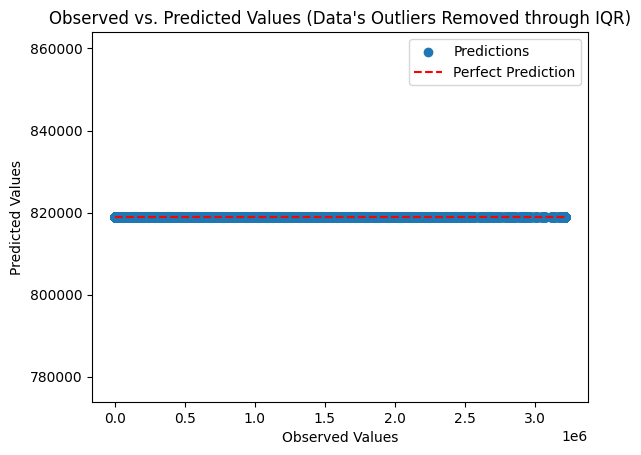

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(y__median_test, predictions_median,label='Predictions')
plt.plot([min(y__median_test), max(y__median_test)], [min(predictions_median), max(predictions_median)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title("Observed vs. Predicted Values (Data's Outliers Removed through IQR)")
plt.legend()
plt.show()
plt.savefig("poisson_observed_vs_predicted_median.png")
#graphs and saves observed vs. predicted values (outliers removed through IQR away)


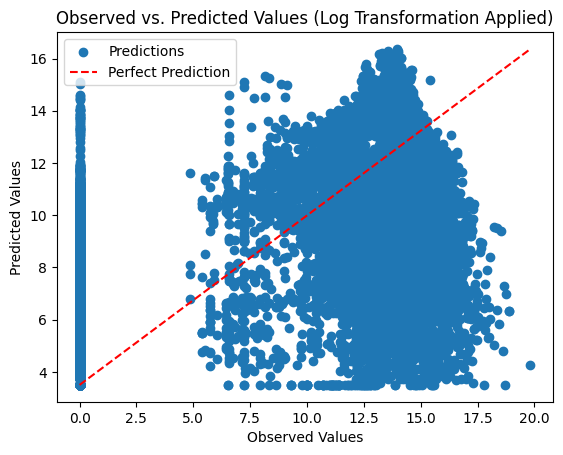

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(y__log_test, predictions_log,label='Predictions')
plt.plot([min(y__log_test), max(y__log_test)], [min(predictions_log), max(predictions_log)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values (Log Transformation Applied)')
plt.legend()
plt.show()
plt.savefig("poisson_observed_vs_predicted_log.png")
#graphs and saves observed vs. predicted values (data log transformed)


Graph generated and saved.


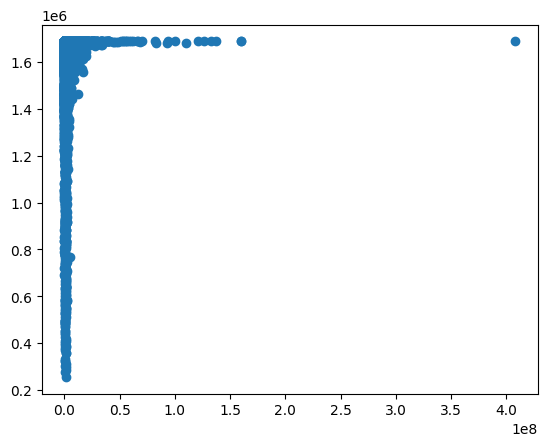

In [21]:
try:
    plt.scatter(y_test, predictions)
    plt.savefig("plot.png")
    print("Graph generated and saved.")
except Exception as e:
    print(f"Plot failed: {e}")
# tests if plot created

A plot was generated, so the test's expecations were met.

In [22]:
log_step("Visuals Analysis Displayed")
#prints that step was completed

[2025-04-16 22:25:17] Visuals Analysis Displayed


## Generating Reports

In [32]:
log_step("Generating Reports")
#logs time of step

[2025-04-16 22:27:09] Generating Reports


### Original Data

In [33]:
score = clf.score(X_test.values.reshape(-1, 1), y_test)
predictions = clf.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("Model Score:", score)
print("MSE: ", mse)
#generates and prinst MSE and r-squared on original data

Model Score: 0.002693973499347746
MSE:  40839273939600.09


In [34]:
cv_results = cross_validate(clf, X_train.values.reshape(-1, 1), y_train,
                            cv=5,
                            scoring=['neg_mean_squared_error', 'r2'],
                            return_train_score=True)

print("Cross Validate Test MSE:", -cv_results['test_neg_mean_squared_error'])
print("Cross Validate Test R²:", cv_results['test_r2'])
#cross validates and prinst MSE and R-squared

Cross Validate Test MSE: [8.37393436e+13 3.30214573e+13 2.78395102e+13 3.31022245e+13
 2.62795769e+13]
Cross Validate Test R²: [0.00030807 0.00079355 0.00105111 0.00047229 0.00066863]


In [35]:
with open("poisson_model_report.txt", "w") as f:
    f.write("Poisson Model Performance Report\n")
    f.write("========================\n")
    f.write(f"Mean Squared Error (MSE): "+ str(mse) + "\n")
    f.write(f"R-squared (R²): " + str(score) + "\n")
    f.write(f"Cross-Validation (MSE): " + str(cv_results['test_r2']) + "\n")
    f.write(f"Average CV Score (R²): " + str(cv_results['test_neg_mean_squared_error']) + "\n")
# creates pdf of results

### Data with Outliers Removed through Standard Deviations Away

In [36]:
score_mean = clf_mean.score(X_mean_test.values.reshape(-1, 1),y_mean_test)
mse_mean = mean_squared_error(y_mean_test, predictions_mean)
print("Model (no outliers based on mean) Score:", score_mean)
print("MSE mean: ", mse_mean)
# generates and prints MSE and r-squared on data with outliers removed by standard deviations

Model (no outliers based on mean) Score: 0.0019319613551788128
MSE mean:  10631726924267.488


In [37]:
cv_results_mean = cross_validate(clf_mean, X_mean_train.values.reshape(-1, 1), y_mean_train,
                            cv=5,
                            scoring=['neg_mean_squared_error', 'r2'],
                            return_train_score=True)

print("Cross Validate Mean Test MSE:", -cv_results_mean['test_neg_mean_squared_error'])
print("Cross Validate Mean Test R²:", cv_results_mean['test_r2'])
# cross validates on data with outliers removed by standard deviations (prints MSE and r-squared)

Cross Validate Mean Test MSE: [1.01706757e+13 1.10077920e+13 1.12003147e+13 1.10711764e+13
 1.03792960e+13]
Cross Validate Mean Test R²: [0.00078302 0.00105624 0.00109652 0.00033645 0.00087335]


In [38]:
with open("poisson_model_report_mean.txt", "w") as f:
    f.write("Poisson Model Performance Report (Outliers Removed through Standard Deviations Away)\n")
    f.write("========================\n")
    f.write(f"Mean Squared Error (MSE): " + str(mse_mean) + "\n")
    f.write(f"R-squared (R²): " + str(score_mean) + "\n")
    f.write(f"Cross-Validation (MSE): " + str(cv_results_mean['test_r2']) + "\n")
    f.write(f"Average CV Score (R²): " + str(cv_results_mean['test_neg_mean_squared_error']) + "\n")
# creates pdf of results with outliers removed through standard deviations away

### Data with Outliers Removed through IQRs away

In [39]:
score_median = clf_median.score(X_median_test.values.reshape(-1, 1),y__median_test)
mse_median = mean_squared_error(y__median_test, predictions_median)
print("Model (no outliers based on median) Score:", score_median)
print("MSE median: ", mse_median)
#generates and prints MSE and R-squared on data with outliers removed by IQR

Model (no outliers based on median) Score: -1.0858840857608243e-06
MSE median:  1308816023268.6018


In [40]:
cv_results_median = cross_validate(clf_median, X_median_train.values.reshape(-1, 1), y_median_train,
                            cv=5,
                            scoring=['neg_mean_squared_error', 'r2'],
                            return_train_score=True)

print("Cross Validate Median Test MSE:", -cv_results_median['test_neg_mean_squared_error'])
print("Cross Validate Median Test R²:", cv_results_median['test_r2'])
# cross validates on data with outliers removed by IQR (prints MSE and r-squared)

Cross Validate Median Test MSE: [1.29573810e+12 1.31672075e+12 1.33107990e+12 1.31596785e+12
 1.31717294e+12]
Cross Validate Median Test R²: [-4.03040098e-04 -2.26755489e-06 -1.37710699e-04 -7.68340059e-05
 -4.63809313e-06]


In [41]:
with open("poisson_model_report_median.txt", "w") as f:
    f.write("Poisson Model Performance Report (Outliers Removed through IQRs Away)\n")
    f.write("========================\n")
    f.write(f"Mean Squared Error (MSE): " + str(mse_median) + "\n")
    f.write(f"R-squared (R²): " + str(score_median) + "\n")
    f.write(f"Cross-Validation (MSE): " + str(cv_results_median['test_r2']) + "\n")
    f.write(f"Average CV Score (R²): " + str(cv_results_median['test_neg_mean_squared_error']) + "\n")
# creates pdf of results with outliers removed through IQRs away

### Log Transformed Data

In [42]:
score_log = clf_log.score(X_log_test.values.reshape(-1, 1),y__log_test)
mse_log = mean_squared_error(y__log_test, predictions_log)
print("Model (log transformed) Score:", score_log)
print("MSE log: ", mse_log)
#generates and prints MSE and R-squared on data with logarithmic transformation

Model (log transformed) Score: 0.09858806028453393
MSE log:  36.940747655014526


In [43]:
cv_results_log = cross_validate(clf_log, X_log_train.values.reshape(-1, 1), y_log_train,
                            cv=5,
                            scoring=['neg_mean_squared_error', 'r2'],
                            return_train_score=True)

print("Cross Validate Log Test MSE:", -cv_results_log['test_neg_mean_squared_error'])
print("Cross Validate Log Test R²:", cv_results_log['test_r2'])
# cross validates on data with log transofrmation (prints MSE and r-squared)


Cross Validate Log Test MSE: [37.05762033 36.85571939 37.24678195 37.68466027 36.90699158]
Cross Validate Log Test R²: [0.14697555 0.15296536 0.14090368 0.1322251  0.1474509 ]


In [44]:
with open("poisson_model_report_log.txt", "w") as f:
    f.write("Poisson Model Performance Report (Log Transformed Data)\n")
    f.write("========================\n")
    f.write(f"Mean Squared Error (MSE): " + str(mse_log) + "\n")
    f.write(f"R-squared (R²): " + str(score_log) + "\n")
    f.write(f"Cross-Validation (MSE): " + str(cv_results_log['test_r2']) + "\n")
    f.write(f"Average CV Score (R²): " + str(cv_results_log['test_neg_mean_squared_error']) + "\n")
# creates pdf of results with log transformed data

In [64]:
def test_model_metrics(y_test, predictions, score, mse, tolerance=1e-8):
    mse_2 = mean_squared_error(y_test, predictions)
    r2_2 = r2_score(y_test, predictions)
    assert np.isclose(mse, mse_2, atol=tolerance), \
        f"MSE mismatch: expected {mse_2}, got {mse}"

    assert np.isclose(score, r2_2, atol=tolerance), \
        f"R² mismatch: expected {r2_2}, got {score}"
    print("Model performance metrics validated successfully.")

mse_2 = mean_squared_error(y_test, predictions)
r2_2 = r2_score(y_test, predictions)
test_model_metrics(y_test, predictions, r2_2, mse_2)

if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()

try:
    scores2 = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    print("Cross-validation successful.")
    print("Cross-validation R² scores:", scores2)
    print("Mean CV R² score:", np.mean(scores2))
except Exception as e:
    print(f"Cross-validation failed: {e}")
# tests performance metrics

Model performance metrics validated successfully.
Cross-validation successful.
Cross-validation R² scores: [0.00030807 0.00079355 0.00105111 0.00047229 0.00066863]
Mean CV R² score: 0.0006587296943870058


Test results met expectations, as performance metrics were generated correctly and cross validation was performed.

In [65]:
log_step("Reports Generated")
#prints that step was completed

[2025-04-16 22:42:24] Reports Generated


## Visually Displaying the Analytical Pipeline

In [ ]:
log_step("Visually Displaying Pipelines")
#prints that step was initialized

[2025-04-09 22:04:31] Visually Displaying Pipelines


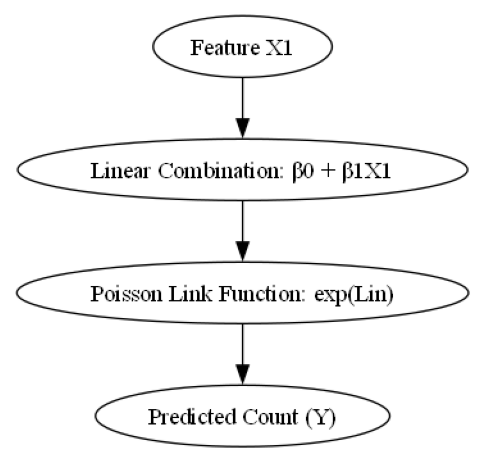

In [ ]:
def plot_poisson_regression():
 dot = Digraph()

 dot.node('X1', 'Feature X1')

 dot.node('Lin', 'Linear Combination: β0 + β1X1')
 dot.edge('X1', 'Lin')

 dot.node('Poisson', 'Poisson Link Function: exp(Lin)')
 dot.edge('Lin', 'Poisson')

 dot.node('Y', 'Predicted Count (Y)')
 dot.edge('Poisson', 'Y')
 return dot
dot = plot_poisson_regression()
img = mpimg.imread('poisson_regression.png')
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()
# Saves and opens the diagram

In [ ]:
log_step("Pipelines Visually Displayed")
#prints that step was completed

[2025-04-09 22:04:32] Pipelines Visually Displayed


In [ ]:
log_step("Stepwise Execution Complete")
log_step("Full Pipeline Execution Complete")
#finishes logging the steps in the data

[2025-04-09 22:04:32] Stepwise Execution Complete
[2025-04-09 22:04:32] Full Pipeline Execution Complete


## Interpreting the Data

The Poisson Regression models did not produce optimistic results. In the original data, the R-squared value returned a score of 0.002693973499347746, and the mean standard error was found as 40,839,273,939,600.09. Predicted against observed values produced a graph with few data points lying near the perfect prediction line. Cross validation showed a wide array of responses, but all MSE's were high and R-squared were low, indicating consistent poor fit. The results of the data set with the outliers removed given the standard deviations were a mean standard error of 10,631,726,924,267.488 and a R-squared value of 0.0019319613551788128. The data did seem to migrate closer to the diagonal line than the original data. Cross validation showed a consistent MSE, but inconsistent R-sqaured. It's overall performance improved from the prior model, but is still not a good model. As for those with outliers handled through interquartile range, the mean standard error was found to be 1,308,816,023,268.6018 and the R-squared was -0.0000010858840857608243. Again, MSE was consistent, but R-squared was not. The graph of original against predicted values reflected this, with a horizontal line. This all still shows a poorly fit model. As for the logarithmic transformed results, the scores did improve. The R-squared value was 0.09858806028453393, and the mean squared error lowered to 36.940747655014526. Cross validation results were more consistent than all other models. The observed against predicted values graph did have significantly more data points fall on the perfect prediction line, but there were still many scattered away from it. The logarithmic transformed data is the best model created through Poisson Regression. The Poisson Regression at this point in the process did not produce a viable prediction graph. Implementing feature engineering techniques may result in a better performance, but other modeling techniques may still show superior results.

Overall, the logarithmic models appear to be the best way to handle outliers in this large data set. However, across various modeling, Poisson Regression, Random Forest, and DNN models had similar results with logarithmic transformed data. Unfortunately, no models generated results strong enough to make reliable decisions upon. Given this, the next steps for this research is to implement feature engineering techniques to attempt to improve model performance. If this does not improve the results, then local data may be more appropriate when creating predictive models. The former will be performed in a new file, as well as the later if poor results are received again. Insights could potentially be gained on predicting the vaccination needs for future purposes, as well as providing information to policy makers on potential effective techniques in limiting the deaths due to the virus.

## GUI Elements

The main GUI elements implemented were in the early graphs while exploring
the data. As the main purpose of this product is to share results and knowledge
on model performance for pandemic related data. These graphs included Box
Plots for COVID-19 vaccinations and deaths, were a drop down box allowed for
specific locations or the entirety of the world data was viewed. The box plot is
important in outlier identification. This was also applied to histograms and line
plots of the COVID-19 doses and related deaths. Histograms are important in
understanding the structure of the data, while the line plot could be utilized to
indetify potential trends in the data. If an individual was interested in just local
information, or how this compared to another area or the entire world data, it is
now visually available to them for visualizing outliers, data structure, and trends.
Another visual aid provided was the COVID-19 vaccinations and deaths shown on
a map of the world. As the daily rates did not appear to add much context,
cumulative counts were added and applied as a drop down option for the graph.
This allows for people to see where potential areas of high or low activity for
vaccinations administered or deaths due to the virus. All utlizied the
update_layout() function from plotly (Plotly, n.d.). Otherwise, the product is fairly
straight-forward, as analysis models and their results are printed. The additions
enhance the user experience by providing a detailed and big picture viewpoints
of the data. This could aid in analysis by identifying any areas that appear
significant or as potential outliers to the user.

## Security

At this time, no security systems have been developed for the product. The data utilized is made publicly available and contains no personal identifiable information. As for the processing and modeling of the data, the purpose is for educational use, only. Testing of functions is performed to ensure all are appropriately working. If anyone were to make harmful changes to these, then they would only be preventing themselves from gaining insightful results.

If users upload data that contains personal information or develop their own product that is used for important decision making, then it is recommended that more measures are included for security. Additionally, any externally uploaded data should be fully preprocessed, as the current data was. The only exception is no implementations were performed for analyzing that the data type was appropriate for the data, as this must be examined and changed on an individual basis. All cleaning and preprocessing steps should be examined with introduction of new data, as well as analyzing the newly uploaded data for validity.

There is a risk that others could make changes to the models, and therefore, change the integrity of the model. It is recommended to all users to review the models for appropriate structure prior to implementation.

## Revisions

New additions to the product included more references, addressing security, creating a pop-up to allow url data uploads, adding tests to each function, and a help guide at the top of each file.

Updates to the files included a more in depth exploration of potential seasonality and trends in the data, fixing code to actually use the split of the train and test data, and updating codes so no warnings or error messages were received.

Failed attempts at revisions were introducing more feature engineering techniques for Poisson Regression, Random Forest, and DNN modeling. Introducing seasonality did not show increase performance in the models. As previous research has shown more success at predicting with more localized data, it is recommended to take this approach when analyzing pandemic related data (Alroy-Preis et al., 2021; Barbeira et al., 2022).

From this information and the poor performance across all models, future goals are to attempt to rectify prior errors at improving model performance in new files. If these still return poor results, an exploration of learning data at a more local level will be the new objective to compare performance against.

For adherence to industry standards, it is imperative to have reproducibile and replicabile results (Gîrjău, Horton, & Pruim, 2023). Given this information, it is recommended to not make decisions from any of the current models. Any further implementations should focus on the logarithmic transformed data set. Additionally, the elimination of errors and warning messages follows best practices. It is also recommended to learn from the work of others. Prior work was used when devloping the models, as seen in the inserted referneces.

## References 

Alroy-Preis, S., Angulo, F. Anis, E., Brooks, N., Haas, E. J., Jodar, :., Khan, F., Levy, Y., McLaughlin, J. M., Mircus, G., Pan, K., Singer, S. R., Smaja, M., Southern, J., & Swerdlow, D. L. (2021). Impact and effectiveness of mRNA BNT162b2 vaccine against SARS-CoV-2 infections and COVID-19 cases, hospitalisations, and deaths following a nationwide vaccination campaign in Israel: an observational study using national surveillance data. Lancet, 397(10287), 1819-1829. doi: 10.1016/S0140-6736(21)00947-8 

Appel, C., Beltekian, D., Dattani, S., Gavrilov, D., Giattino, C., Hasell, J.,
Macdonald, B., Mathieu, E., Ortiz-Ospina, E., Ritchie, H., Rodes-Guirao, L., &
Roser, M. (2025). COVID-19 pandemic [Data set]. Our World in Data.
https://ourworldindata.org/coronavirus

Barbeira, P. B., Bartolomeu, M. L., Castelli, J. M., Del Valle Juarez, M., Esperatti, M., Fuentes, N., Galligani, G., Giovacchini, C. M., Iummato, L. E., Laurora, M., Pennini, V., Pesce, M., Rearte, A. Rearte, R., Santoro, A., Tarragona, S., & Vizzotti, C. (2022). Effectiveness of rAd26-rAd5, ChAdOx1 nCoV-19, and BBIBP-CorV vaccines for risk of infection with SARS-CoV-2 and death due to COVID-19 in people older than 60 years in Argentina: a test-negative, case-control, and retrospective longitudinal study. Lancet, 399(10331), 1254-1264. doi: 10.1016/S0140-6736(22)00011-3 

Barron, J. A., Buenrostro-Mariscal, R., Crossa, J., Montesinos-Lopez, A.
Montesinos-Lopez, J. C., Montesinos-Lopez, O. A., & Salazar, E. (2021).
Application of a Poisson deep neural network model for the prediction of count
data in genome-based prediction. The Plant Genome, 14(3).
https://doi.org/10.1002/tpg2.20118

Brownlee, J. (2022). Your first deep learning project in Python with Keras step-by-step. *Machine Learning Mastery.* https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Elliott, L., Loomis, D., & Richardson, D. B. (2005). Poisson regression analysis of
ungrouped data. Occupational and Environmental Medicine, 62, 325-329. DOI:
10.1136/oem.2004.017459

Fandohan, A. B., Kakaï, R. G., & Mushaglusa, C. Z. (2022). Random forest in count
data modelling: An analysis of the influence of data features and overdispersion
on regression performance. Journal of Probability and Statistics, 1.
https://doi.org/10.1155/2022/2833537

GeeksforGeeks. (2025). Ranom forest regression in Python. https://www.geeksforgeeks.org/random-forest-regression-in-python/ 

Gîrjău, M., Horton, N. J., & Prium, R. (2023). Fostering better coding practices for data scientists. HDSR. https://hdsr.mitpress.mit.edu/pub/8wsiqh1c/release/4

Katla, N. (2020). Poisson regression implementation- Python. *Medium.* https://medium.com/@kn12/poisson-regression-implementation-python-28d15e95dc15

Liu, J. (2024). Navigating the financial landscape: The power and limitations of
the ARIMA model. Highlights in Science, Engineering and Technology, 88, 747-752. https://drpress.org/ojs/index.php/HSET/article/view/19082/18645

National Cancer Institute. (2023). Cleaning data: The basics. Center for
Biomedical Informatics and Information Technology.
https://datascience.cancer.gov/training/learn-data-science/clean-data-basics

The Pennsylvania State University. (n.d.). 9: Poisson Regression.
https://online.stat.psu.edu/stat504/book/export/html/782#:~:text=Interpretations,tabletop%20of%20a%20certain%20area

Plotly. (n.d.). Creating and updating figures in Python.
https://plotly.com/python/creating-and-updating-figures/#updating-figures

Sarahjane3102. (2022). How to split the dataset With scikit-learn’s train_test_split() function *GeeksforGeeks.* https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/